In [ ]:
"""
References

https://stackoverflow.com/questions/46844654/how-to-visualize-kmeans-clustering-on-multidimensional-data
https://datascience.stackexchange.com/questions/37913/finding-clusters-in-multidimensional-data
https://www.geeksforgeeks.org/multidimensional-data-analysis-in-python/
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
https://stackoverflow.com/questions/25650263/k-means-clustering-for-multidimensional-data
https://www.udemy.com/data-science-and-machine-learning-with-python-hands-on/learn/lecture/4020560#questions
https://matplotlib.org/users/text_intro.html
"""

In [2]:
# imports
import random as rn
import pandas as pd
import matplotlib.pyplot as plt

from numpy import array
from pandas import Series, DataFrame
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [3]:
# define functions that populate the variables

# are there reps in this doctor's area?
def whiteSpace():
    whiteSpaceChoices = [0,1] # 0 means dr in whitespace (no reps available), 1 for means dr in rep zone
    numChoices = 1
    proportion = [20,80]
    return rn.choices(whiteSpaceChoices,weights=proportion,k=numChoices)[0]

# is the doctor accepting visits?
def noVisitors():
    noVisitorChoices = [0,1] # 0 means dr not accepting visits, 1 means dr accepts visits
    numChoices = 1
    proportion = [20,80]
    return rn.choices(noVisitorChoices,weights=proportion,k=numChoices)[0]

def shortVisNoSample():
    lower = 0
    upper = 5
    return rn.randint(lower,upper)

def longVisNoSample():
    lower = 0
    upper = 3
    return rn.randint(lower,upper)

def shortVisWthSample():
    lower = 0
    upper = 5
    return rn.randint(lower,upper)

def longVisWthSample():
    lower = 0
    upper = 2
    return rn.randint(lower,upper)

def dinnerMeet():
    lower = 0
    upper = 2
    return rn.randint(lower,upper)

def sympAttend():
    lower = 0
    upper = 1
    return rn.randint(lower,upper)

def shortCall():
    lower = 0
    upper = 5
    return rn.randint(lower,upper)

def longCall():
    lower = 0
    upper = 3
    return rn.randint(lower,upper)

def webVisit():
    lower = 0
    upper = 10
    return rn.randint(lower,upper)

def bannerServed():
    lower = 0
    upper = 20
    return rn.randint(lower,upper)

def infoReq():
    lower = 0
    upper = 5
    return rn.randint(lower,upper)

def downloads():
    lower = 0
    upper = 3
    return rn.randint(lower,upper)

def lettersOut():
    lower = 0
    upper = 5
    return rn.randint(lower,upper)

def samplesOut():
    lower = 0
    upper = 5
    return rn.randint(lower,upper)

In [4]:
# data initialisation
numDoctors = 100

# doctorVisted = choice of Y or N, 1 or 0
shortVisitsNoSample= []
longVisitsNoSample = []
shortVisitsWithSample = []
longVisitsWithSample = []
dinnersAttended = []
symposiumAttended = []

shortPhoneCalls = []
longPhoneCalls = []

webSiteVisits = []
webBannerAdsServed = []
webInfoRequests = []
webDownloads = []

snailMailLetters = []
snailMailSamples = []

for dr in range(0,numDoctors):
    whiteSpaceStatus = None
    acceptVisitStatus = None
    whiteSpaceStatus = whiteSpace()
    acceptVisitStatus = noVisitors()
    
    if whiteSpaceStatus == 0:
        shrtVisNoSample = 0
        lgVisNoSample = 0
        shrtVisSample = 0
        lgVisSample = 0
        dinners = 0
        shCall = 0
        lgCall = 0
    elif acceptVisitStatus == 0:
        shrtVisNoSample = 0
        lgVisNoSample = 0
        shrtVisSample = 0
        lgVisSample = 0
        dinners = dinnerMeet()
        shCall = shortCall()
        lgCall = longCall()
    else:
        shrtVisNoSample = shortVisNoSample()
        lgVisNoSample = longVisNoSample()
        shrtVisSample = shortVisWthSample()
        lgVisSample = longVisWthSample()
        dinners = dinnerMeet()
        shCall = shortCall()
        lgCall = longCall()

    symps = sympAttend()
    webviews = webVisit()
    banners = bannerServed()
    requests = infoReq()
    dl = downloads()
    letters = lettersOut()
    samples = samplesOut()
    
    shortVisitsNoSample.append(shrtVisNoSample)
    longVisitsNoSample.append(lgVisNoSample)
    shortVisitsWithSample.append(shrtVisSample)
    longVisitsWithSample.append(lgVisSample)
    dinnersAttended.append(dinners)
    symposiumAttended.append(symps)

    shortPhoneCalls.append(shCall)
    longPhoneCalls.append(lgCall)

    webSiteVisits.append(webviews)
    webBannerAdsServed.append(banners)
    webInfoRequests.append(requests)
    webDownloads.append(dl)

    snailMailLetters.append(letters)
    snailMailSamples.append(samples)

In [5]:
dfMktgTouches = pd.DataFrame()
dfMktgTouches['Short visit - no sample'] = shortVisitsNoSample
dfMktgTouches['Long visit - no sample'] = longVisitsNoSample
dfMktgTouches['Short visit with sample'] = shortVisitsWithSample
dfMktgTouches['Long visit with sample'] = longVisitsWithSample
dfMktgTouches['Dinners attended'] = dinnersAttended
dfMktgTouches['Symposium attended'] = symposiumAttended
dfMktgTouches['Short phone calls'] = shortPhoneCalls
dfMktgTouches['Long phone calls'] = longPhoneCalls
dfMktgTouches['Website visits'] = webSiteVisits
dfMktgTouches['Banners served'] = webBannerAdsServed
dfMktgTouches['Info requests'] = webInfoRequests
dfMktgTouches['Downloads'] = webDownloads
dfMktgTouches['Letters sent'] = snailMailLetters
dfMktgTouches['Samples sent'] = snailMailSamples

In [6]:
dfMktgTouches.head()

,Short visit - no sample,Long visit - no sample,Short visit with sample,Long visit with sample,Dinners attended,Symposium attended,Short phone calls,Long phone calls,Website visits,Banners served,Info requests,Downloads,Letters sent,Samples sent
0,0,0,0,0,1,1,3,2,1,18,4,1,4,4
1,0,0,0,0,1,0,0,1,1,16,5,1,2,4
2,2,1,0,1,1,0,4,0,1,17,0,0,1,2
3,0,0,0,0,0,0,0,0,9,0,0,3,5,2
4,0,0,0,0,0,0,0,0,1,17,0,2,4,0


In [7]:
# influences on prescribing behaviour
# script uplifts
scriptUplifts = []
def ScriptUpliftCalc(idx):

    shortVisNoSampleWeight = 2
    shortVisNoSampleScore = shortVisNoSampleWeight*dfMktgTouches.iloc[idx]['Short visit - no sample']/5

    longVisNoSampleWeight = 3
    longVisNoSampleScore = longVisNoSampleWeight*dfMktgTouches.iloc[idx]['Long visit - no sample']/3

    shortVisWithSampleWeight = 4
    shortVisWithSampleScore = shortVisWithSampleWeight*dfMktgTouches.iloc[idx]['Short visit with sample']/5

    longVisWithSampleWeight = 3
    longVisWithSampleScore = longVisWithSampleWeight*dfMktgTouches.iloc[idx]['Long visit with sample']/2

    dinnerWeight = 5
    dinnerScore = dinnerWeight*dfMktgTouches.iloc[idx]['Dinners attended']/2

    sympWeight = 5
    sympScore = sympWeight*dfMktgTouches.iloc[idx]['Symposium attended']

    shortCallWeight = 2
    shortCallScore = shortCallWeight*dfMktgTouches.iloc[idx]['Short phone calls']/5

    longCallWeight = 3
    longCallScore = longCallWeight*dfMktgTouches.iloc[idx]['Long phone calls']/3

    webVisitWeight = 2
    webVisitScore = webVisitWeight*dfMktgTouches.iloc[idx]['Website visits']/10

    bannerWeight = 1
    bannerScore = bannerWeight*dfMktgTouches.iloc[idx]['Banners served']/20

    infoReqWeight = 3
    infoReqScore = infoReqWeight*dfMktgTouches.iloc[idx]['Info requests']/5

    downloadsWeight = 4
    downloadsScore = downloadsWeight*dfMktgTouches.iloc[idx]['Downloads']/3

    lettersWeight = 2
    lettersScore = lettersWeight*dfMktgTouches.iloc[idx]['Letters sent']/5

    sentSamplesWeight = 4
    sentSamplesScore = sentSamplesWeight*dfMktgTouches.iloc[idx]['Samples sent']/5
    
    totalUpliftScore = shortVisNoSampleScore+longVisNoSampleScore+shortVisWithSampleScore+longVisWithSampleScore+dinnerScore+sympScore+shortCallScore+longCallScore+webVisitScore+bannerScore+infoReqScore+downloadsScore+lettersScore+sentSamplesScore
    
    return float("{0:.1f}".format(totalUpliftScore))

In [8]:
dfMktgTouches2 = dfMktgTouches
scriptUplifts = []
for i in range(numDoctors):
    scriptUplifts.append(ScriptUpliftCalc(i))

In [9]:
dfMktgTouches2['Rx uplift %'] = scriptUplifts

In [10]:
dfMktgTouches2.head()

,Short visit - no sample,Long visit - no sample,Short visit with sample,Long visit with sample,Dinners attended,Symposium attended,Short phone calls,Long phone calls,Website visits,Banners served,Info requests,Downloads,Letters sent,Samples sent,Rx uplift %
0,0,0,0,0,1,1,3,2,1,18,4,1,4,4,20.3
1,0,0,0,0,1,0,0,1,1,16,5,1,2,4,12.8
2,2,1,0,1,1,0,4,0,1,17,0,0,1,2,10.5
3,0,0,0,0,0,0,0,0,9,0,0,3,5,2,9.4
4,0,0,0,0,0,0,0,0,1,17,0,2,4,0,5.3


In [11]:
print(list(dfMktgTouches2.columns[:-1]))

['Short visit - no sample', 'Long visit - no sample', 'Short visit with sample', 'Long visit with sample', 'Dinners attended', 'Symposium attended', 'Short phone calls', 'Long phone calls', 'Website visits', 'Banners served', 'Info requests', 'Downloads', 'Letters sent', 'Samples sent']


In [13]:
features = list(dfMktgTouches2.columns[:-1])
# Separating out the features
x = dfMktgTouches2.loc[:, features].values
# Separating out the target
y = dfMktgTouches2.loc[:,['Rx uplift %']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

C:\Users\ianda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [14]:
# scaled_features_df
scaled_features = StandardScaler().fit_transform(dfMktgTouches2.values)

In [15]:
scaled_features_df = pd.DataFrame(scaled_features, index=dfMktgTouches2.index, columns=dfMktgTouches2.columns)

In [16]:
scaled_features_df.head()

,Short visit - no sample,Long visit - no sample,Short visit with sample,Long visit with sample,Dinners attended,Symposium attended,Short phone calls,Long phone calls,Website visits,Banners served,Info requests,Downloads,Letters sent,Samples sent,Rx uplift %
0,-0.862181,-0.767199,-0.826056,-0.660776,0.301511,1.128152,0.637240,0.795468,-1.097909,1.213306,0.816796,-0.591579,1.146779,0.884941,0.476319
1,-0.862181,-0.767199,-0.826056,-0.660776,0.301511,-0.886405,-1.039707,-0.050775,-1.097909,0.879980,1.387982,-0.591579,-0.099720,0.884941,-0.720864
2,0.264853,0.135388,-0.826056,0.687746,0.301511,-0.886405,1.196222,-0.897018,-1.097909,1.046643,-1.467948,-1.515921,-0.722969,-0.264333,-1.088000
3,-0.862181,-0.767199,-0.826056,-0.660776,-0.904534,-0.886405,-1.039707,-0.897018,1.433293,-1.786627,-1.467948,1.257106,1.770029,-0.264333,-1.263587
4,-0.862181,-0.767199,-0.826056,-0.660776,-0.904534,-0.886405,-1.039707,-0.897018,-1.097909,1.046643,-1.467948,0.332763,1.146779,-1.413606,-1.918047


In [17]:
# convert to principal components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [18]:
finalDf = pd.concat([principalDf, dfMktgTouches2[['Rx uplift %']]], axis = 1)

In [19]:
finalDf.head()

,principal component 1,principal component 2,Rx uplift %
0,-0.804782,-1.036982,20.3
1,-1.640669,-1.422021,12.8
2,0.105261,0.036820,10.5
3,-2.226333,0.344701,9.4
4,-2.279005,1.130549,5.3


In [20]:
# make arrayX pca1 = x, pca2 = y
X = []
for i in range(len(finalDf)):
    X.append([finalDf.iloc[i]['principal component 1'],finalDf.iloc[i]['principal component 2']])
X = array(X)

In [21]:
print(X[:5])

[[-0.80478152 -1.03698214]
 [-1.6406687  -1.42202134]
 [ 0.10526104  0.03682029]
 [-2.22633308  0.34470106]
 [-2.27900507  1.13054945]]


[0 0 0 1 1 0 1 1 3 2 1 1 3 1 1 1 2 3 0 0 0 3 3 1 0 2 3 2 0 3 1 1 2 2 0 2 3
 0 2 1 1 3 1 3 1 0 0 0 2 0 0 0 3 3 1 1 0 1 3 0 1 0 2 1 2 2 0 3 3 0 2 1 3 0
 3 1 0 0 2 2 0 2 0 3 1 1 3 1 3 0 1 3 0 3 0 2 0 1 0 1]


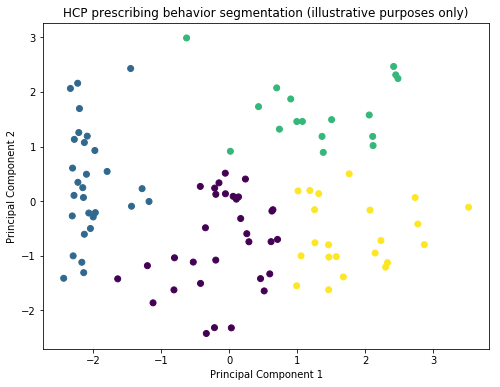

In [25]:
data = X

model = KMeans(n_clusters=4)

# Note I'm scaling the data to normalize it! Important for good results.
model = model.fit(data)

# We can look at the clusters each data point was assigned to
print(model.labels_)

# And we'll visualize it:
plt.figure(figsize=(8, 6))
plt.title('HCP prescribing behavior segmentation (illustrative purposes only)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.scatter(data[:,0], data[:,1], c=model.labels_.astype(float))
plt.show()

In [26]:
seg = model.labels_
print(len(seg))

100


In [27]:
dfMktgTouches3 = dfMktgTouches2
dfMktgTouches3['Segment type'] = seg
dfMktgTouches3.head()

,Short visit - no sample,Long visit - no sample,Short visit with sample,Long visit with sample,Dinners attended,Symposium attended,Short phone calls,Long phone calls,Website visits,Banners served,Info requests,Downloads,Letters sent,Samples sent,Rx uplift %,Segment type
0,0,0,0,0,1,1,3,2,1,18,4,1,4,4,20.3,0
1,0,0,0,0,1,0,0,1,1,16,5,1,2,4,12.8,0
2,2,1,0,1,1,0,4,0,1,17,0,0,1,2,10.5,0
3,0,0,0,0,0,0,0,0,9,0,0,3,5,2,9.4,1
4,0,0,0,0,0,0,0,0,1,17,0,2,4,0,5.3,1


[0 0 0 1 1 0 1 1 2 3 1 1 2 1 1 1 3 2 0 0 0 2 2 1 0 3 2 3 0 2 1 1 3 3 0 3 2
 0 3 1 1 2 1 2 1 0 0 0 3 0 0 0 2 2 1 1 0 1 2 0 1 0 3 1 3 3 0 2 2 0 3 1 2 0
 2 1 0 0 3 3 0 3 0 2 1 1 2 1 2 0 1 2 0 2 0 3 0 1 0 1]


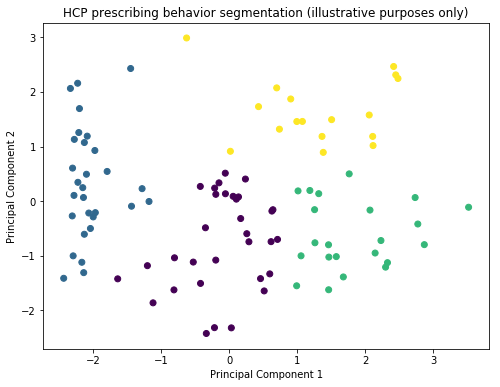

In [29]:
data = X

model = KMeans(n_clusters=4)

# Note I'm scaling the data to normalize it! Important for good results.
model = model.fit(data)

# We can look at the clusters each data point was assigned to
print(model.labels_)

# And we'll visualize it:
plt.figure(figsize=(8, 6))
plt.title('HCP prescribing behavior segmentation (illustrative purposes only)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.scatter(data[:,0], data[:,1], c=model.labels_.astype(float))

plt.savefig('ExampleSegmentation.png')
plt.savefig('ExampleSegmentation.pdf')

In [30]:
dfMktgTouches3.to_csv('HCPbehaviorSegmentationIllustration.csv')